In [1]:
import pandas as pd
import matplotlib.pyplot as plt

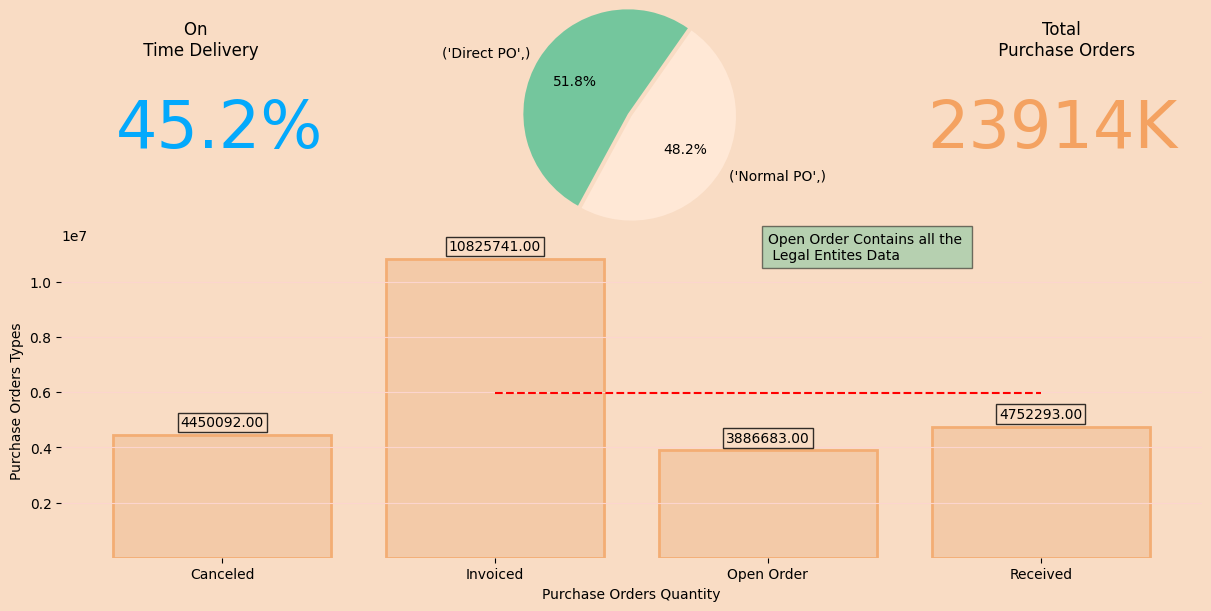

In [56]:
dataset = pd.read_excel('procurmentdata1.xlsx')
df1 = dataset

# Below code we define our dashboard Style within X variable
x =  [['a', 'b', 'b','d'],
     ['c', 'c', 'c', 'c'],
     ['c', 'c', 'c', 'c'],
     ['c', 'c', 'c', 'c']]

fig, asx = plt.subplot_mosaic(x, figsize=(12,6), layout="constrained")


# First viviual which is defined as a in or mosaic x.
# =================================================== 
deliverrtime = dataset['DeliverStatus'].value_counts(normalize=True).loc['OnTime']

asx['a'].text(0.2,0.2,str(deliverrtime*100)+'%', fontsize=47, color='#03a9fc')
asx['a'].set(title='On \n Time Delivery')
asx['a'].axis('off')   


# Writing Our Second Visiual which is defined as 'b' in our mosaic x above
# ========================================================================

# Make note that this b is repeated 2 times in our visual
# below variable names are self explonatiory

labels = dataset.value_counts(['PoType'], normalize=True).index.tolist()
sizes = dataset.value_counts(['PoType'], normalize=True).values.tolist()

# To explode our pie chart
explode = (0.1, 0)

# Switch of the Axis
asx['b'].axis('off')

# Now Create Our Pie ChartChart
asx['b'].pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', startangle=55, radius=2.5, colors=['#74c69d','#ffe8d6'] )


# Writing Our Third Visiual which is defined as 'd' in our mosaic x above
# =======================================================================


# Grabbing Colors for our condition if achievment is below 90 our value will be Red
colorB = '#f4a261'
colorA = '#ef767a'

# You can change the value to check the color
cutoffvalue = dataset['PoValue'].sum()//1000

# Our Conditions to cange the value
if cutoffvalue <= 90:
    colorDyanamic = colorA
else:
    colorDyanamic = colorB
    
asx['d'].text(0.0,0.2,str(cutoffvalue) + 'K', fontsize=47, color=colorDyanamic)
asx['d'].set(title='Total \n Purchase Orders')
asx['d'].axis('off')    


# # Code for asx c Which takes the biggest area in our dashboard.

df = df1.groupby(['PoStatus'])['PoValue'].sum()

asx['c'].bar(df.index, df.values, bottom=1, color = ['#F3CAA8'], linewidth=2, edgecolor='#F3AD74')
for x in asx['c'].containers:
    asx['c'].bar_label(x, fmt='%.2f',padding=4, bbox={'facecolor': '#F9DCC4', 'alpha': 0.8, 'pad': 2})

asx['c'].set(ylabel='Purchase Orders Types', xlabel='Purchase Orders Quantity')

asx['c'].hlines(df.mean(), 'Invoiced', 'Received', color='red',  label='Mean', linestyles='dashed')
asx['c'].spines[['top', 'right', 'left', 'bottom']].set_visible(False)
asx['c'].grid(True, which='major', axis='y', color='#FCD5CE')

asx['c'].annotate( "Open Order Contains all the \n Legal Entites Data", (df.index[2], df.values[1]), bbox=dict(facecolor='#74c69d', alpha=0.5))
asx['c'].set_facecolor('#F9DCC4')
fig.set_facecolor('#F9DCC4')

plt.savefig('images/Dashbaord.PNG')